In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('data/recipes.csv')

In [6]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [ ]:
df['AggregatedRating']

AggregatedRating
False    269294
True     253223
Name: count, dtype: int64

In [5]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [9]:
df['Images'].iloc[0]

'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg", \n"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg")'

# Time format

In [15]:
df[['CookTime','PrepTime','TotalTime']]

,CookTime,PrepTime,TotalTime
0,PT24H,PT45M,PT24H45M
1,PT25M,PT4H,PT4H25M
2,PT5M,PT30M,PT35M
3,PT20M,PT24H,PT24H20M
4,PT30M,PT20M,PT50M
...,...,...,...
522512,PT35M,PT1H,PT1H35M
522513,PT3H,PT30M,PT3H30M
522514,PT3H,PT1H,PT4H
522515,NaN,PT15M,PT15M


## Convertendo tempo ISO 8601 para horas decimais
Vamos criar uma função para transformar strings como 'PT4H25M' em valores numéricos de horas (ex: 4.42).

In [21]:
import re

def parse_duration(duration):
    if pd.isna(duration):
        return 0
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', duration)
    if not match:
        return 0
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours + minutes / 60



In [22]:
for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df[col + '_hours'] = df[col].apply(parse_duration)

df[['CookTime', 'PrepTime', 'TotalTime', 'CookTime_hours', 'PrepTime_hours', 'TotalTime_hours']].head()

,CookTime,PrepTime,TotalTime,CookTime_hours,PrepTime_hours,TotalTime_hours
0,PT24H,PT45M,PT24H45M,24.000000,0.750000,24.750000
1,PT25M,PT4H,PT4H25M,0.416667,4.000000,4.416667
2,PT5M,PT30M,PT35M,0.083333,0.500000,0.583333
3,PT20M,PT24H,PT24H20M,0.333333,24.000000,24.333333
4,PT30M,PT20M,PT50M,0.500000,0.333333,0.833333


In [24]:
df['CookTime_hours'].isna().sum()

np.int64(0)

Onde cook time é nan, devemos preencher com 0!

In [34]:
df_temp = df[df['PrepTime_hours']<5]

In [ ]:
df_temp = df[df['c']]

In [25]:
df['CookTime'].fillna(0, inplace = True)

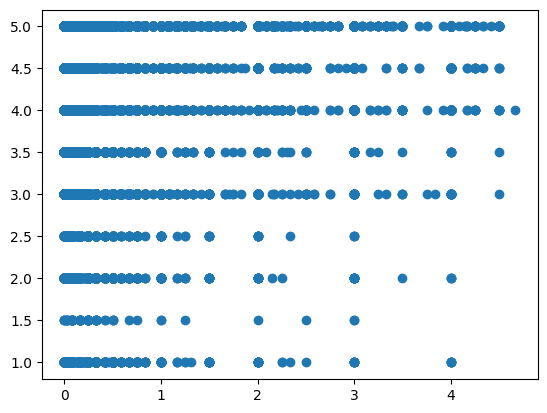

In [36]:
plt.scatter(df_temp['PrepTime_hours'], df_temp['AggregatedRating'])

In [39]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions', 'CookTime_hours',
       'PrepTime_hours', 'TotalTime_hours'],
      dtype='object')

In [50]:
df['ProteinContent'].describe()

count    522517.000000
mean         17.469510
std          40.128837
min           0.000000
25%           3.500000
50%           9.100000
75%          25.000000
max       18396.200000
Name: ProteinContent, dtype: float64

In [51]:
df2 = df_temp[df_temp['ProteinContent'] < 100]

 Plotar matriz de correlação para decidir que features fazer scatterplot!

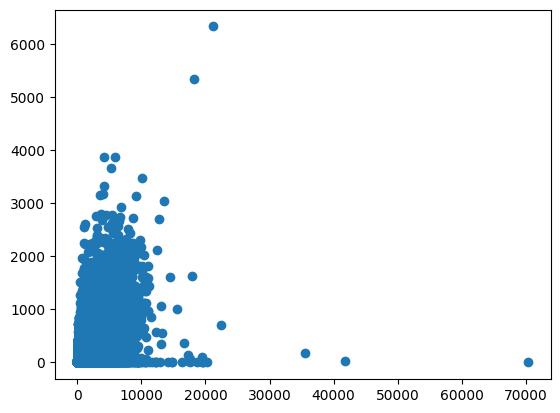

In [62]:
plt.scatter(df2['Calories'], df2['CholesterolContent'])

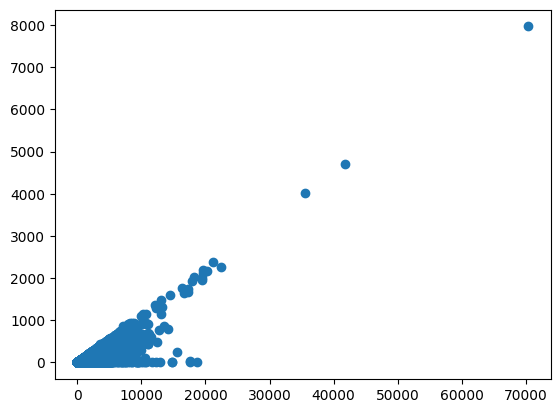

In [63]:
plt.scatter(df2['Calories'], df2['FatContent'])

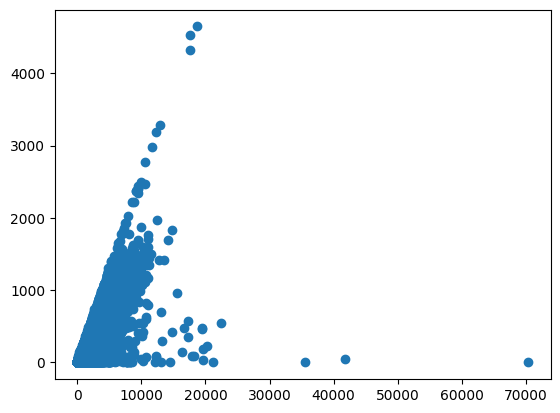

In [64]:
plt.scatter(df2['Calories'], df2['CarbohydrateContent'])

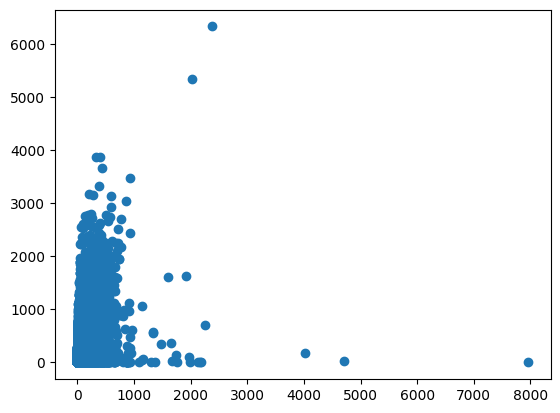

In [68]:
plt.scatter(df2['FatContent'], df2['CholesterolContent'])

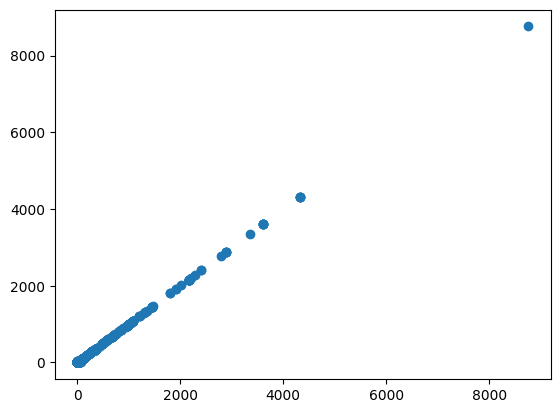

In [66]:
plt.scatter(df2['CookTime_hours'], df2['TotalTime_hours'])

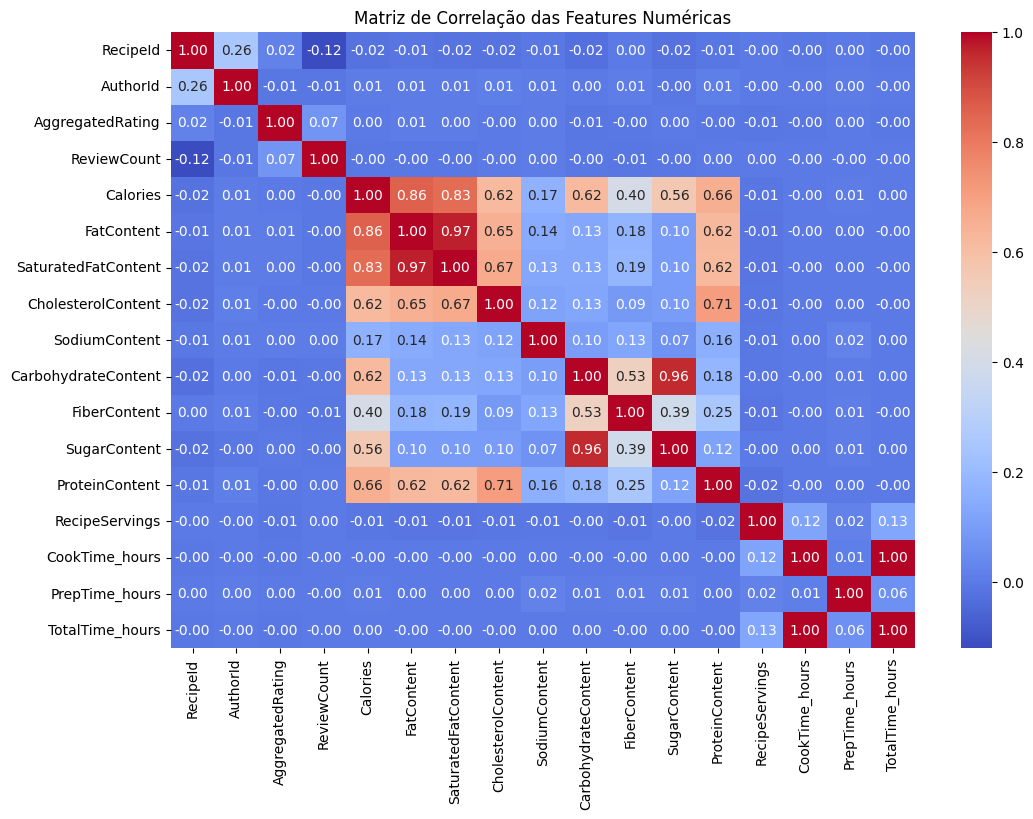

In [65]:
# Seleciona apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcula a matriz de correlação
corr = numeric_df.corr()

# Plota o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()